In [1]:
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import unicodedata
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer
import nltk
pd.set_option('display.max_rows',None)

import matplotlib as mpl

plt.rc('figure', figsize=(13, 10))
plt.rc('font', size=16)
plt.style.use('seaborn-darkgrid')

In [2]:
#import oliver_acquire as a

In [3]:
#scrape = a.scrape_github_data()

In [4]:
#data = pd.DataFrame(scrape)

In [5]:
#data.to_csv('git_url.csv')

In [6]:
df = pd.read_csv('git_url.csv', index_col=0)

In [7]:
df = df.drop_duplicates()

In [8]:
df

,repo,language,readme_contents
0,jtleek/datasharing,NaN,How to share data with a statistician\n=======...
1,rdpeng/ProgrammingAssignment2,R,### Introduction\n\nThis second programming as...
2,octocat/Spoon-Knife,HTML,### Well hello there!\n\nThis repository is me...
3,SmartThingsCommunity/SmartThingsPublic,Groovy,# SmartThings Public GitHub Repo\n\nAn officia...
4,tensorflow/tensorflow,C++,"<div align=""center"">\n <img src=""https://www...."
5,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot..."
6,LSPosed/MagiskOnWSA,NaN,# Magisk on WSA (with Google Apps)\n\n## Featu...
7,Pierian-Data/Complete-Python-3-Bootcamp,Jupyter Notebook,# Complete-Python-3-Bootcamp\nCourse Files for...
8,nightscout/cgm-remote-monitor,JavaScript,Nightscout Web Monitor (a.k.a. cgm-remote-moni...
9,jwasham/coding-interview-university,NaN,# Coding Interview University\n\n> I originall...


In [9]:
#removing missing values
#remove the rows that have missing values in language
df = df.dropna(axis=0).reset_index(drop=True)

In [10]:
#change jupyter notebook to python
df['language'].replace('Jupyter Notebook', 'Python', inplace=True )

In [11]:

#import pycld2 as cld2
#def remove_nonenglish (df):
    #'''
     #takes in df and 1 column to check if the text is in englis if not that row is going to be remove
    #'''
    #for n in range (0, len(df)):
        #text = df.readme_contents[n]
        #lang = cld2.detect(text)
        #if lang != 'en':
            #df =df.drop([n])
        #return df.reset_index(drop=True)


In [12]:
#import pycld2 as cld2
#text = 'house is blue'
#lang = cld2.detect(text)
#print(lang)

In [13]:
#Not the best at detect english
#remove_nonenglish(df)

In [14]:
def top_n_target(df,target,  n):
    '''
    takes in a df and target and give you the top n of you target
    return a df with only the top n 
    '''
    
    #get the value counts of the target
    targ =pd.DataFrame(df[[target]].value_counts())\
    .reset_index().rename(columns= {0:'cnt', 'index':target})
    #get the top 5
    topl= list(targ.loc[0:(n-1)].language.values)
    #get new df with only the top n values of target
    df= df[df.language.isin(topl)].reset_index(drop=True)
    return  df

In [15]:
df = top_n_target(df, 'language', 3)

In [16]:
df.language.value_counts()

JavaScript    68
Python        51
Java          31
Name: language, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             150 non-null    object
 1   language         150 non-null    object
 2   readme_contents  150 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [18]:
def basic_clean (string):
    '''
    takes in a string and lowercase everything, normalize unicode characters, replace anything that is not a letter,
    number, whitespace or a single quote.
    retunr a clean string
    '''
    
    string = string.lower()
    string = unicodedata.normalize('NFKC',string)\
    .encode('ascii', 'ignore')\
    .decode('utf-8')
    string = re.sub(r"\w*.?\w*@\w*.com", '', string)
    string = re.sub(r"[^a-z0-9\s]", '', string)
    string = re.sub(r'\w*http\w*', '', string)
    string = re.sub(r'\w*github\w*', '', string)
    string = re.sub(r'\w*html\w*', '', string)
    string = re.sub(r'\w*gmail\w*', '', string)
    string = re.sub(r'\w*\n\w*', '', string)

    return string

In [19]:
def tokenize (string):
    '''
    take in a string and tokenize all the words in the string
    '''
    
    # Create the tokenizer
    tokenizer = nltk.tokenize.ToktokTokenizer()
    # Use the tokenizer
    string = tokenizer.tokenize(string, return_str = True)
    return string


def stem (string):
    '''
     takes in a text and return the text after applying stemming to all the words.
    '''
    # Create porter stemmer.
    ps = nltk.porter.PorterStemmer()
    # Apply the stemmer to each word in our string.
    stems = [ps.stem(word) for word in string.split()]
    text_stemmed = ' '.join(stems)
    return text_stemmed 



def lemmatize (text):
    '''
     Takes in some text and return the text after applying lemmatization to each word.
    '''
    wnl = nltk.stem.WordNetLemmatizer()
    
    # Use the lemmatizer on each word in the list of words we created by using split.
    lemmas = [wnl.lemmatize(word) for word in text.split()]
    
    # Join our list of words into a string again; assign to a variable to save changes.
    text_lemmatized = ' '.join(lemmas)
    
    return text_lemmatized
    


def remove_stopwords (string, extra_words= [], exclude_words=[]):
    '''
    Takes in a strand return the text after removing all the stopwords.
    Parameters:
    string : text in  string type
    extra_words : list of additional stop words to include,
    exclude_words : list of any words that we don't want to remove.
    '''
    # standard English language stopwords list from nltk
    stopword_list = stopwords.words('english')
    
    #add extra_words
    stopword_list =stopword_list + extra_words
    
    #exclude words
    for element in exclude_words:
        if element in stopword_list:
            stopword_list.remove(element)
    # Split words.
    words = string.split()
    
    # Create a list of words from my string with stopwords removed and assign to variable.
    filtered_words = [word for word in words if word not in stopword_list]
    
    # Join words in the list back into strings; assign to a variable to keep changes.
    string_without_stopwords = ' '.join(filtered_words)
    
    return string_without_stopwords

In [20]:
def prepare_data(df, column, extra_words=[], exclude_words=[]):
    '''
    This function take in a df and the string name for a text column with 
    option to pass lists for extra_words and exclude_words and
    returns a df with the  original text, cleaned (tokenized and stopwords removed) , stemmed text,
    lemmatized text.
    '''
    df['clean'] = df[column].apply(basic_clean)\
                            .apply(tokenize)\
                            .apply(remove_stopwords, 
                                   extra_words=extra_words, 
                                   exclude_words=exclude_words)
    
    df['stemmed'] = df['clean'].apply(stem)
    
    df['lemmatized'] = df['clean'].apply(lemmatize)
    
    return df

In [21]:
#clean, tokenized, stemming, lemmatize
df = prepare_data(df,'readme_contents')

In [22]:
df.head()

,repo,language,readme_contents,clean,stemmed,lemmatized
0,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot...",p img altbootstrap logo width200 sleek intuiti...,p img altbootstrap logo width200 sleek intuit ...,p img altbootstrap logo width200 sleek intuiti...
1,Pierian-Data/Complete-Python-3-Bootcamp,Python,# Complete-Python-3-Bootcamp\nCourse Files for...,files complete python 3 bootcamp course pieria...,file complet python 3 bootcamp cours pierian d...,file complete python 3 bootcamp course pierian...
2,nightscout/cgm-remote-monitor,JavaScript,Nightscout Web Monitor (a.k.a. cgm-remote-moni...,nightscout web monitor aka herokuherokuimghero...,nightscout web monitor aka herokuherokuimghero...,nightscout web monitor aka herokuherokuimghero...
3,eugenp/tutorials,Java,The Courses\n==============================\n\...,new learn spring course learn spring master ma...,new learn spring cours learn spring master mas...,new learn spring course learn spring master ma...
4,tensorflow/models,Python,"<div align=""center"">\n <img src=""https://stor...",div img welcome model garden tensorflow model ...,div img welcom model garden tensorflow model g...,div img welcome model garden tensorflow model ...


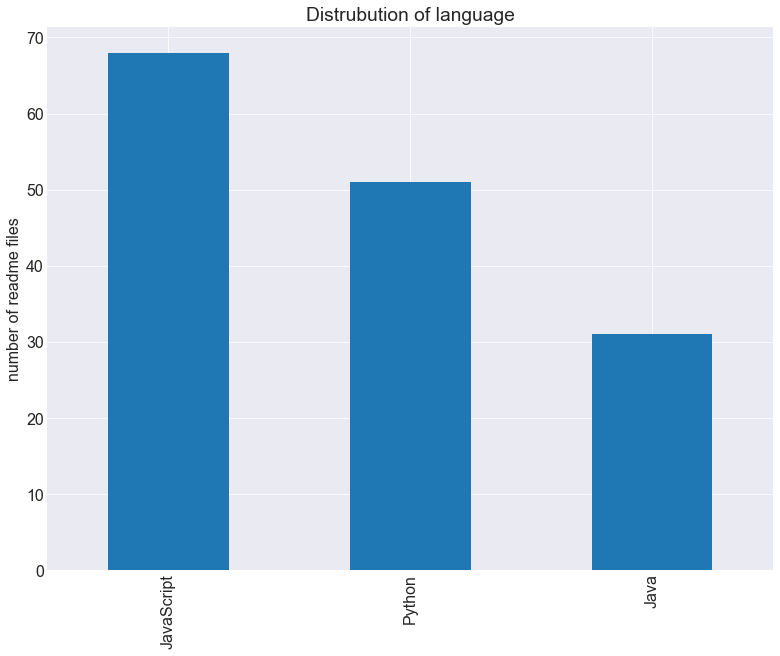

In [23]:
df.language.value_counts().plot.bar()
plt.title('Distrubution of language')
plt.ylabel('number of readme files')
plt.show()

# What are the most common words in READMEs?

In [24]:
#get the list of languages
list_lang = list(df.language.value_counts().index)

In [25]:
#joint all the text of each language
join_text ={}
for language in list_lang :
    join_text[language] = basic_clean(' '.join(df[df.language == language].lemmatized))

#add allwords
join_text['all_words']= basic_clean(' '.join(df.lemmatized))

In [26]:
#check if we have all the languages
join_text.keys()

dict_keys(['JavaScript', 'Python', 'Java', 'all_words'])

In [27]:
#Represent text as word frequencies.
#create a word_count df 
word_counts= pd.DataFrame()
for lang in join_text:
    word_counts[lang] = pd.Series(join_text[lang].split()).value_counts()
word_counts= word_counts.fillna(0).astype(int)

In [28]:
word_counts.sort_values('all_words', ascending=False).head()

,JavaScript,Python,Java,all_words
9,290,345,155,790
use,408,200,70,678
file,382,203,27,612
python,5,440,5,450
function,360,71,3,434


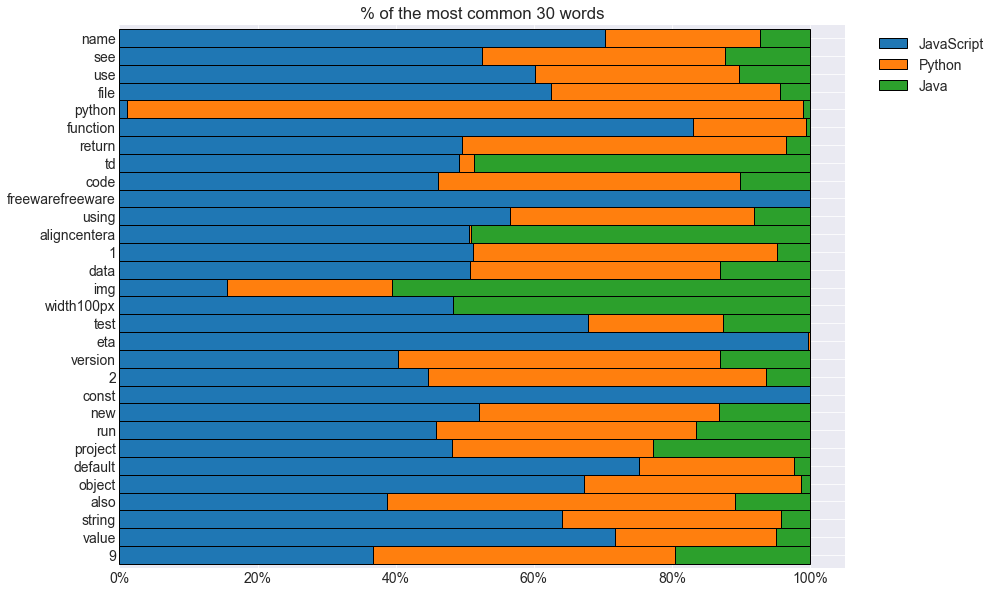

In [33]:
# axis=1 in .apply means row by row
(word_counts.sort_values(by='all_words', ascending=False)
 .head(30)
 .apply(lambda row: row / row['all_words'], axis=1)
 .sort_values(by='all_words')
 .drop(columns='all_words')
 .plot.barh(stacked=True, width=1, ec='black'))
plt.title('% of the most common 30 words')
plt.legend(bbox_to_anchor= (1.03,1))

plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))
plt.show()

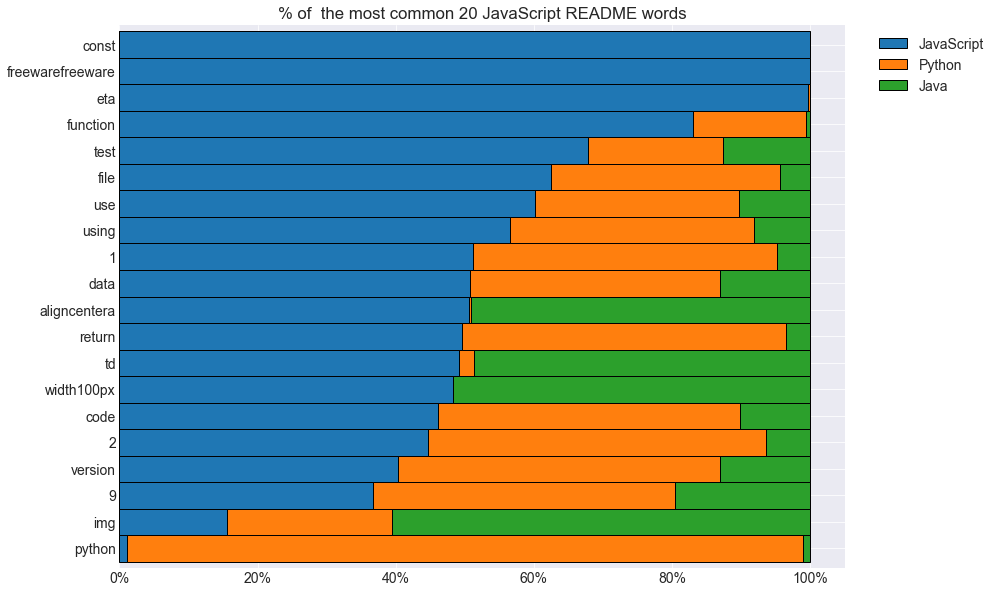

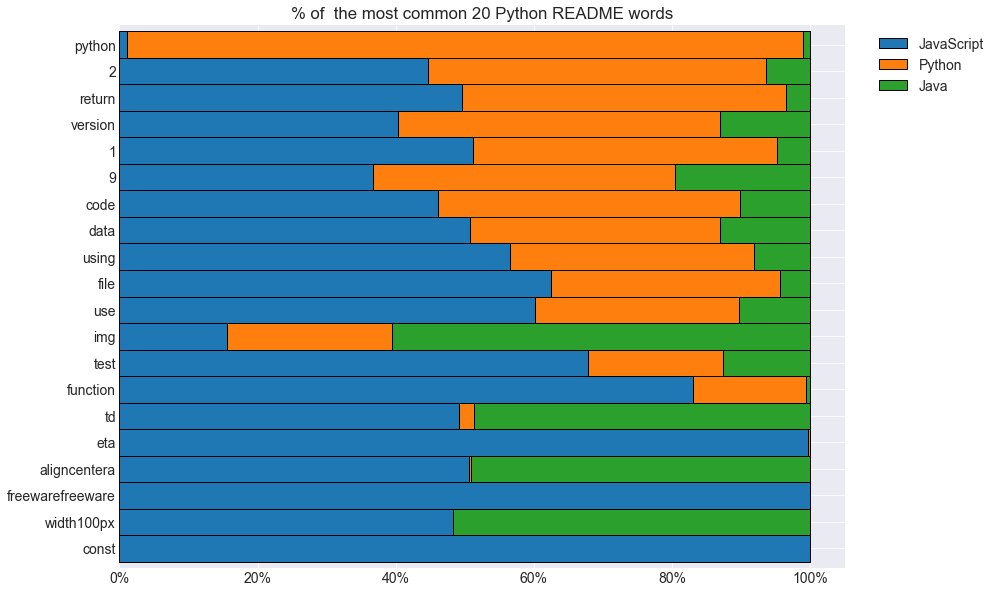

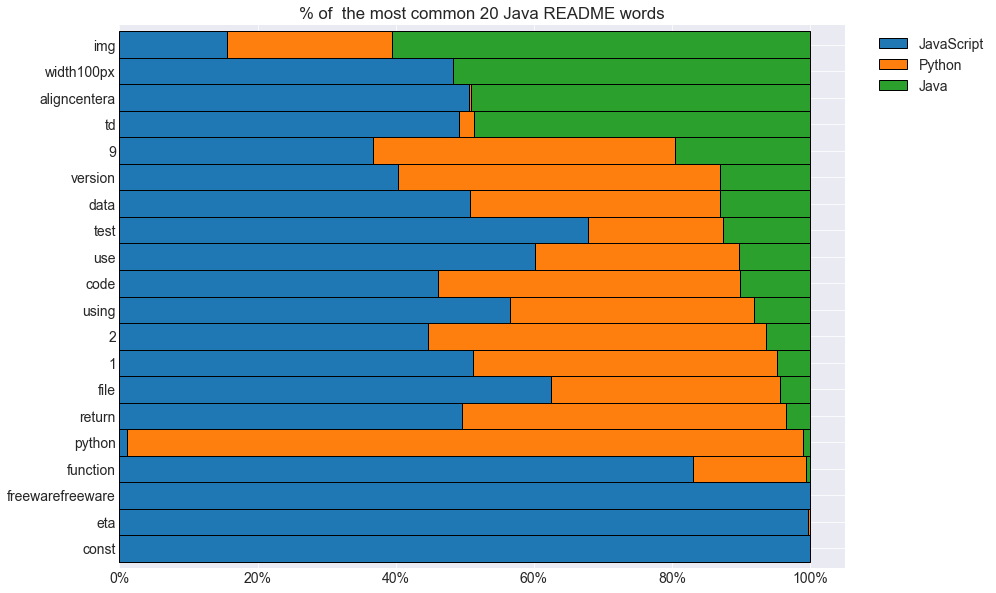

In [31]:
#most common words sorted by each language
for column in word_counts.drop(columns='all_words'):
    # axis=1 in .apply means row by row
    (word_counts.sort_values(by='all_words', ascending=False)
     .head(20)
     .apply(lambda row: row / row['all_words'], axis=1)
     .drop(columns='all_words')
     .sort_values(by= column)
     .plot.barh(stacked=True, width=1, ec='black'))
    plt.title(f'% of  the most common 20 {column} README words')
    plt.legend(bbox_to_anchor= (1.03,1))

    plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))
    plt.show()

In [32]:
def word_cloud (text):
    '''
    takes in a text and create a wordcloud
    '''
    img = WordCloud(background_color='white', width=800, height=600).generate(text)
    plt.imshow(img)
    plt.axis('off')
    plt.show()


def wordcloud_top(df,column, n_top=50):
    '''
    takes in a df , column and a number of top words to show
    '''
    top_all =df.sort_values(column, ascending=False)[[column]].head(n_top)
    word_cloud(' '.join(top_all.index))


def ngrams_wordcloud (text, title,  n=2, top = 20):
    '''
    takes in a text, title, number of ngrams, and number of the top words
    returns a plot barh and a word_cloud
    '''
    #plot barh
    
    plt.subplot(2,2,1)
    pd.Series(nltk.ngrams(text.split(), n=n)).value_counts().head(top).sort_values(ascending = True).plot.barh()
    plt.title(f'Top {top} most common {title} ngrams where n={n}')
    
    #word_cloud
    ng =(pd.Series(nltk.ngrams(text.split(), n=n)).value_counts().head(top)).to_dict()
    ng_words = {k[0] + ' ' + k[1]: v for k, v in ng.items()}
    plt.subplot(2,2,2)
    img = WordCloud(background_color='white', width=800, height=600).generate_from_frequencies(ng_words)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Top {top} most common {title} ngrams where n={n}')
    #plt.tight_layout()
    plt.show()

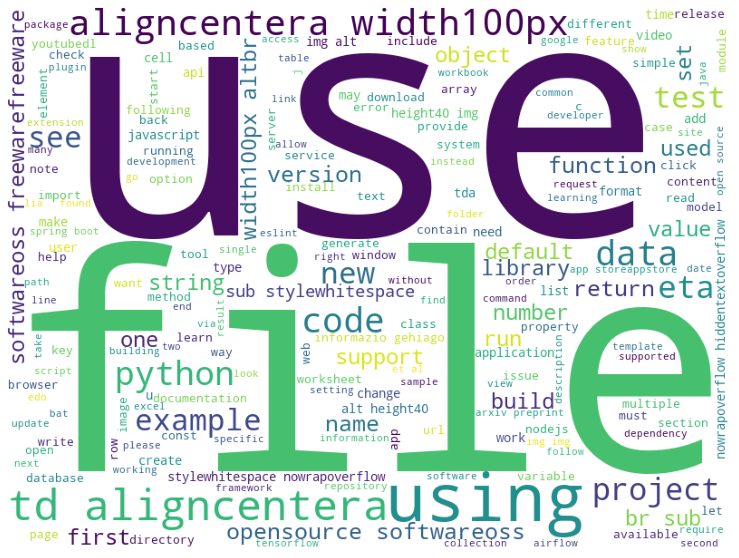

In [34]:
word_cloud(join_text['all_words'])

 ********************* Language : JavaScript *********************


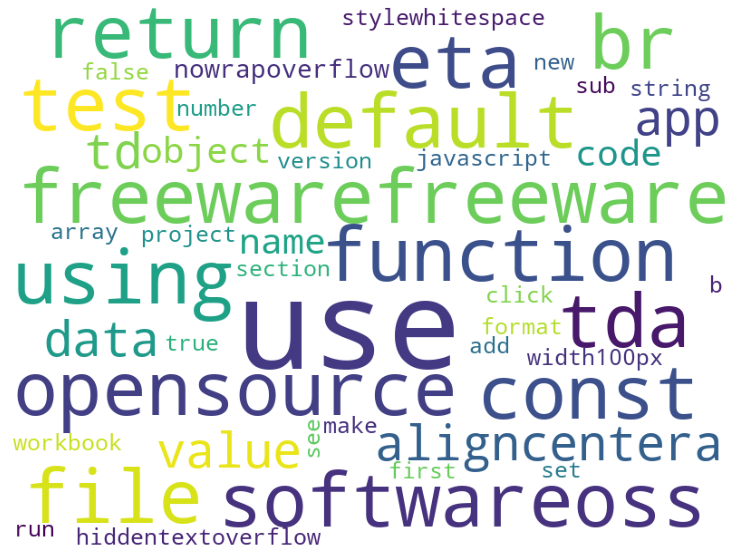

 
 ********************* Language : Python *********************


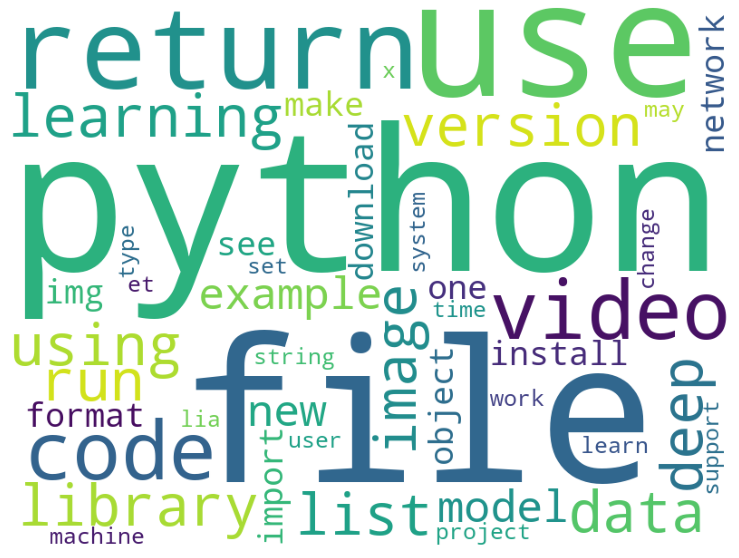

 
 ********************* Language : Java *********************


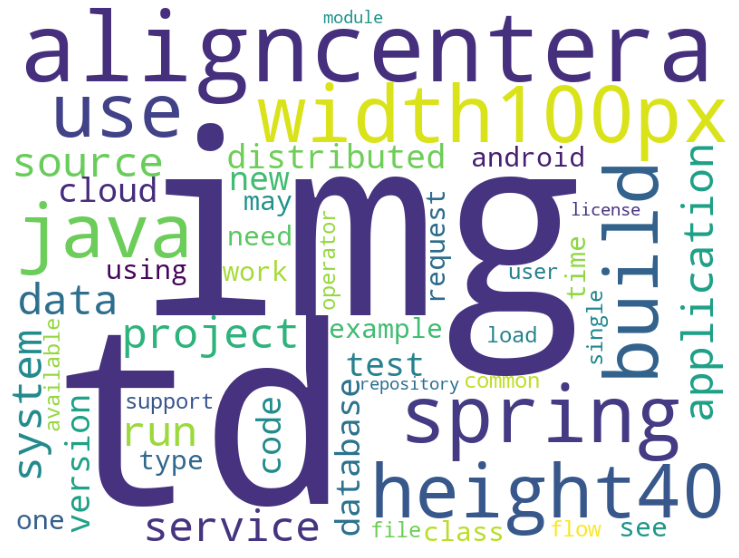

 
 ********************* Language : all_words *********************


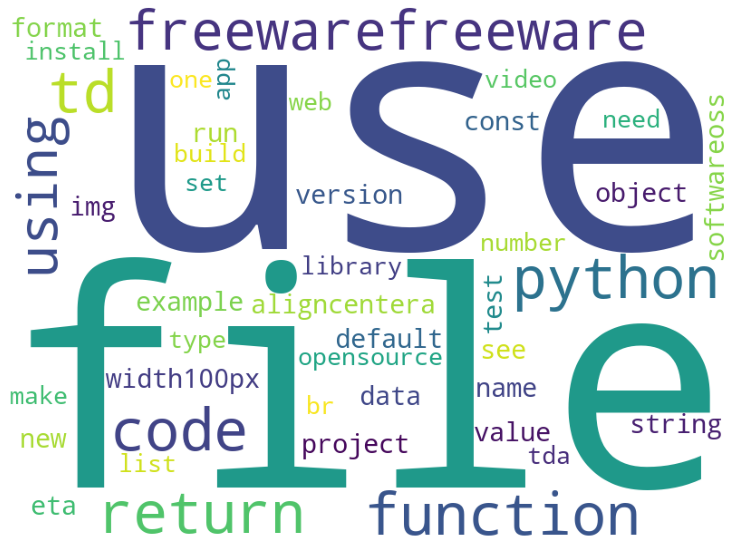

In [35]:
#Top 50 words
for col in word_counts.columns:
    print (f' ********************* Language : {col} *********************')
    wordcloud_top(word_counts, col ,50)
    print(' ')

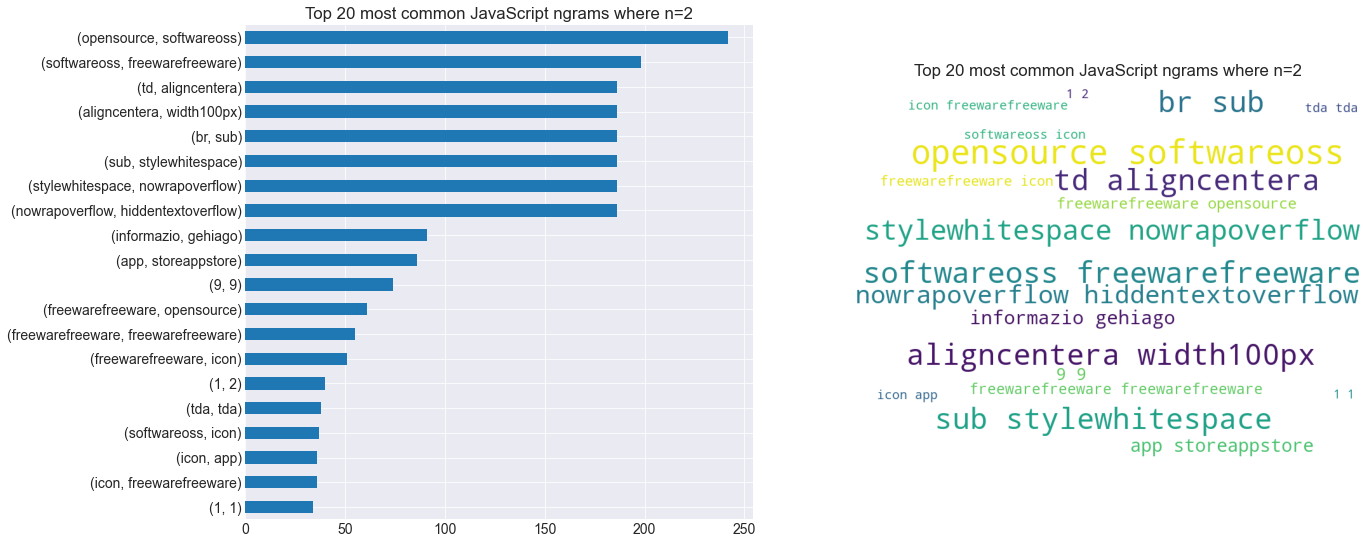

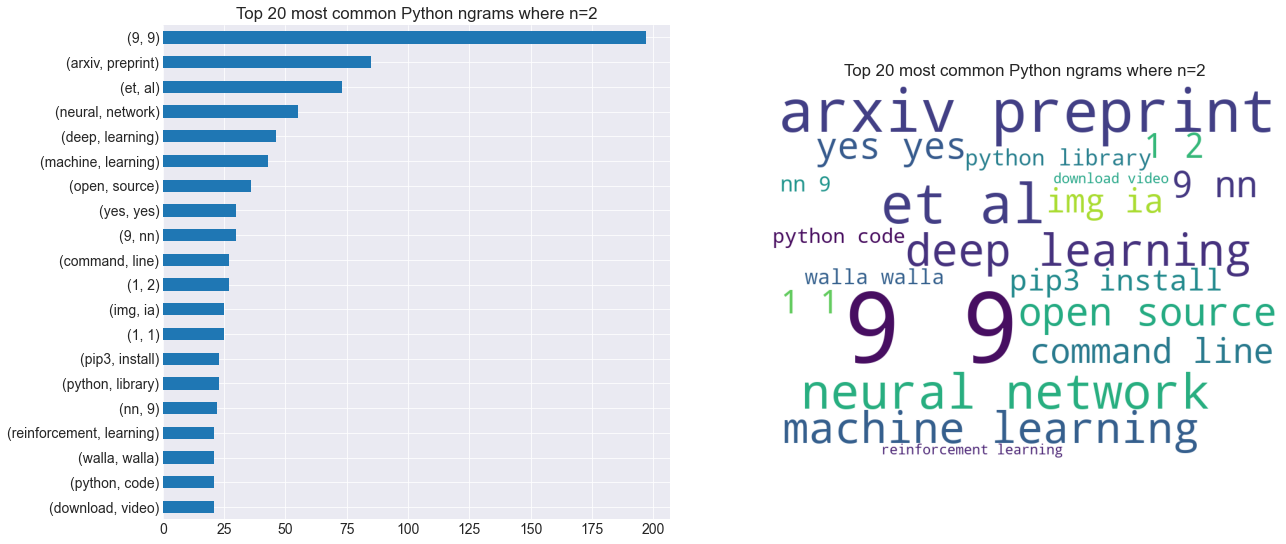

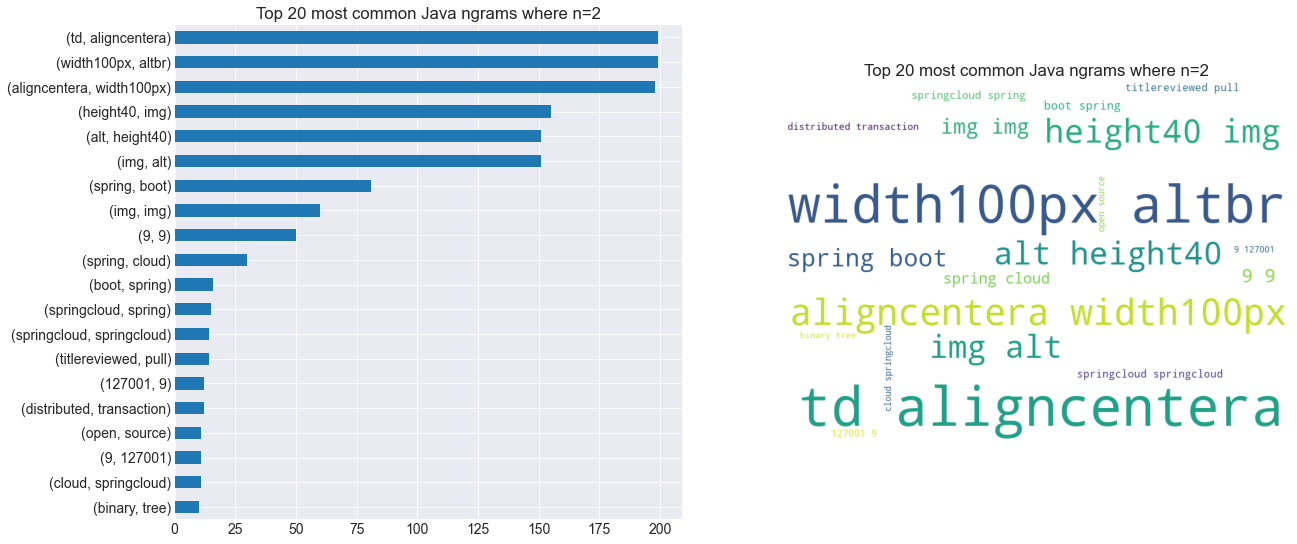

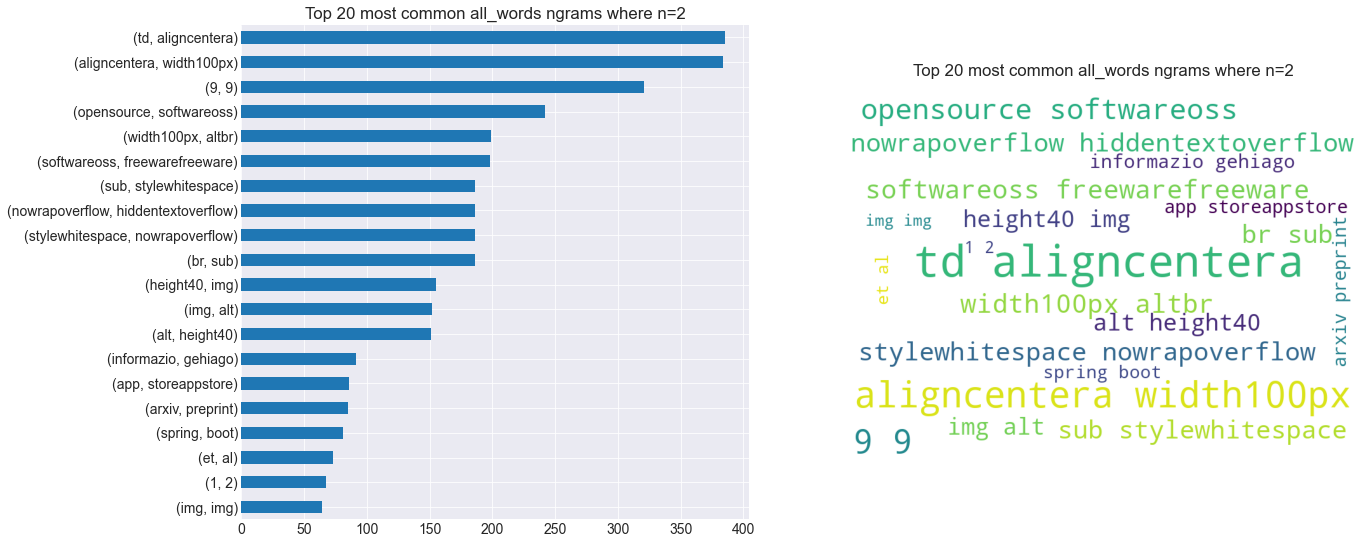

In [36]:
#bigrams
for key in join_text.keys():
    print (' ')
    ngrams_wordcloud(join_text[key], key)
    print (' ')

# Does the length of the README vary by programming language?

In [37]:
#create a column with readme lenght
df['readme_length'] = df.lemmatized.apply(len)

In [38]:
df.head(3)

,repo,language,readme_contents,clean,stemmed,lemmatized,readme_length
0,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot...",p img altbootstrap logo width200 sleek intuiti...,p img altbootstrap logo width200 sleek intuit ...,p img altbootstrap logo width200 sleek intuiti...,2762
1,Pierian-Data/Complete-Python-3-Bootcamp,Python,# Complete-Python-3-Bootcamp\nCourse Files for...,files complete python 3 bootcamp course pieria...,file complet python 3 bootcamp cours pierian d...,file complete python 3 bootcamp course pierian...,54
2,nightscout/cgm-remote-monitor,JavaScript,Nightscout Web Monitor (a.k.a. cgm-remote-moni...,nightscout web monitor aka herokuherokuimghero...,nightscout web monitor aka herokuherokuimghero...,nightscout web monitor aka herokuherokuimghero...,30698


In [39]:
df.groupby('language').readme_length.mean()

language
Java          3156.000000
JavaScript    6813.058824
Python        5455.490196
Name: readme_length, dtype: float64

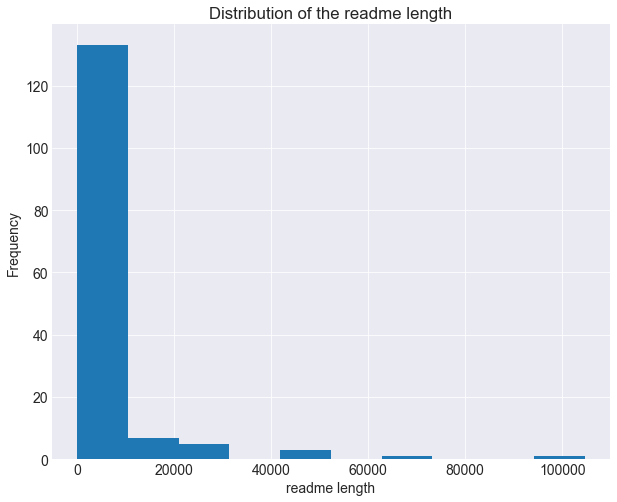

In [41]:
plt.figure(figsize=(10,8))
df.readme_length.plot.hist()
plt.xlabel('readme length')
plt.title ('Distribution of the readme length')
plt.show()

In [43]:
#create a new column
df['word_count'] = df.lemmatized.apply(basic_clean).apply(str.split).apply(len)

In [44]:
df.head(3)

,repo,language,readme_contents,clean,stemmed,lemmatized,readme_length,word_count
0,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot...",p img altbootstrap logo width200 sleek intuiti...,p img altbootstrap logo width200 sleek intuit ...,p img altbootstrap logo width200 sleek intuiti...,2762,362
1,Pierian-Data/Complete-Python-3-Bootcamp,Python,# Complete-Python-3-Bootcamp\nCourse Files for...,files complete python 3 bootcamp course pieria...,file complet python 3 bootcamp cours pierian d...,file complete python 3 bootcamp course pierian...,54,9
2,nightscout/cgm-remote-monitor,JavaScript,Nightscout Web Monitor (a.k.a. cgm-remote-moni...,nightscout web monitor aka herokuherokuimghero...,nightscout web monitor aka herokuherokuimghero...,nightscout web monitor aka herokuherokuimghero...,30698,4158


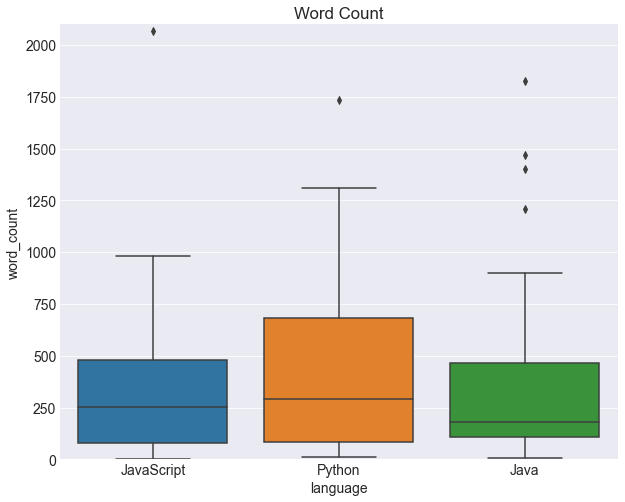

In [48]:
plt.figure(figsize= (10,8))
sns.boxplot(x='language',y ='word_count', data= df)
plt.ylim(0, 2100)
plt.title('Word Count')
plt.show()

(0.0, 16000.0)

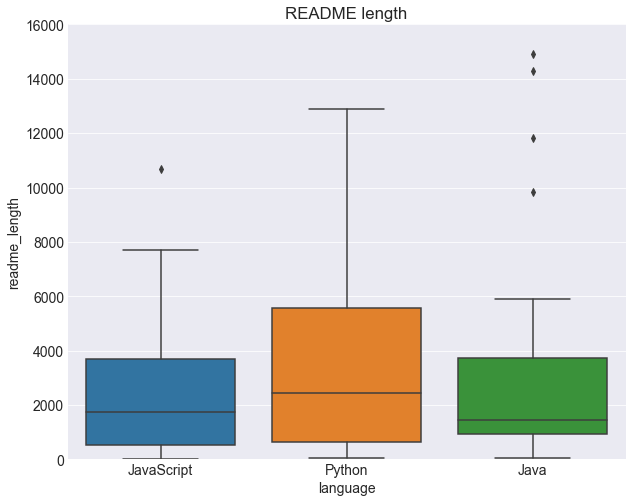

In [49]:
plt.figure(figsize= (10,8))
sns.boxplot(x='language',y ='readme_length', data= df)
plt.title('README length')
plt.ylim(0, 16000)